# 📌 Extracción

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos_pre = pd.read_json(url)

datos_pre

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
columnas_a_normalizar = ['customer', 'phone', 'internet', 'account']

# Normalizar cada columna y combinarlas
dfs_normalizados = [pd.json_normalize(datos_pre[col]) for col in columnas_a_normalizar]
datos = pd.concat([datos_pre.drop(columnas_a_normalizar, axis=1)] + dfs_normalizados, axis=1)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [4]:
type(datos)

pandas.core.frame.DataFrame

In [5]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

# 🔧 Transformación

In [6]:
datos['Charges.Total'] = datos['Charges.Total'].replace(' ', 0.0)
datos['Charges.Total'] = datos['Charges.Total'].astype(np.float64)

In [7]:
datos['Churn'] = datos['Churn'].replace('', np.nan)

In [8]:
datos = datos.dropna(subset=['Churn'])

In [9]:
datos.reset_index(inplace = True, drop=True)

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [11]:
datos[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = datos[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].map(lambda x: x.replace('No internet service','No').strip())
datos[['MultipleLines']] = datos[['MultipleLines']].map(lambda x: x.replace('No phone service','No').strip())

<ipython-input-11-138210556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = datos[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].map(lambda x: x.replace('No internet service','No').strip())
<ipython-input-11-138210556>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[['MultipleLines']] = datos[['MultipleLines']].map(lambda x: x.rep

In [12]:
datos = datos.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [13]:
columnas_texto = datos.select_dtypes(include=['object']).columns

for columna in columnas_texto:
    datos[columna] = datos[columna].str.replace('[^a-zA-Z0-9\-\']', ' ', regex=True)
    datos[columna] = datos[columna].str.replace(r'\s+', ' ', regex=True).str.strip()
    datos[columna] = datos[columna].str.lower()

In [14]:
datos['Cuentas_Diarias'] = datos['Charges.Monthly'] / 30.0

In [15]:
columnas_texto = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Charges.Monthly', 'Charges.Total']

for columna in columnas_texto:
  datos[columna] = datos[columna].replace({'yes': 1, 'no': 0}).astype(int)

<ipython-input-15-311001135>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace({'yes': 1, 'no': 0}).astype(int)
<ipython-input-15-311001135>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace({'yes': 1, 'no': 0}).astype(int)
<ipython-input-15-311001135>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

# 📊 Carga y análisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

Diccionario de datos
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [16]:
datos.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.295897,2279.265086,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.092727,2266.790864,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,398.000000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.000000,1394.000000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,3786.500000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.000000,8684.000000,3.958333


In [17]:
clientes_vigentes_suma = datos['Churn'].isin([0]).sum()
clientes_baja_suma = datos['Churn'].isin([1]).sum()

total = clientes_vigentes_suma + clientes_baja_suma

print(clientes_vigentes_suma)
print(clientes_baja_suma)
print(total)

5174
1869
7043


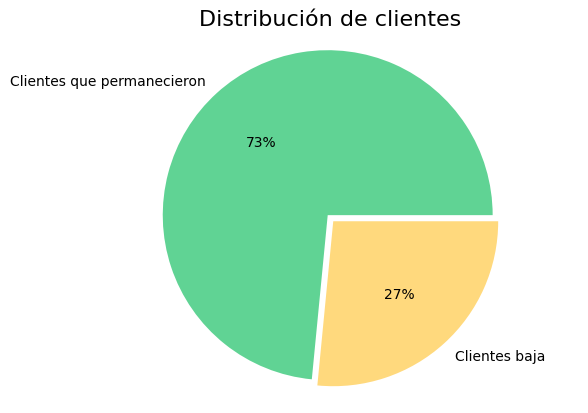

In [18]:
valor = [clientes_vigentes_suma, clientes_baja_suma]
llave = ['Clientes que permanecieron', 'Clientes baja']
colores = ["#60D394", "#FFD97D"]
desfase = (0, 0.05)

plt.pie(valor, labels=llave, colors=colores, autopct='%.0f%%', explode=desfase)

plt.axis("equal")

plt.title("Distribución de clientes", size = 16)

plt.show()

In [19]:
condicion_vigentes = (datos['Churn'] == 0)
condicion_baja = (datos['Churn'] == 1)

datos_clientes_vigentes = datos[condicion_vigentes]
datos_clientes_bajas = datos[condicion_vigentes]

In [20]:
def economicos(datos, imprimir = False):
  agrupado_genero = datos[['gender', 'Charges.Total']].groupby('gender').sum()
  agrupado_contrato = datos[['Contract', 'Charges.Total']].groupby('Contract').sum()
  agrupado_tipopago = datos[['PaymentMethod', 'Charges.Total']].groupby('PaymentMethod').sum()

  if imprimir == True:
    print("Gasto por Género:")
    print(agrupado_genero)
    print("\nGasto por Tipo de Contrato:")
    print(agrupado_contrato)
    print("\nGasto por Método de Pago:")
    print(agrupado_tipopago)

  return agrupado_genero, agrupado_contrato, agrupado_tipopago


In [21]:
datos_genero, datos_contrato, datos_pago = economicos(datos_clientes_vigentes, True)

Gasto por Género:
        Charges.Total
gender               
female        6598077
male          6592744

Gasto por Tipo de Contrato:
                Charges.Total
Contract                     
month-to-month        3377650
one year              3791439
two year              6021732

Gasto por Método de Pago:
                         Charges.Total
PaymentMethod                         
bank transfer automatic        4162059
credit card automatic          4125718
electronic check               3376731
mailed check                   1526313


In [22]:
datos_genero, datos_contrato, datos_pago = economicos(datos_clientes_bajas, True)

Gasto por Género:
        Charges.Total
gender               
female        6598077
male          6592744

Gasto por Tipo de Contrato:
                Charges.Total
Contract                     
month-to-month        3377650
one year              3791439
two year              6021732

Gasto por Método de Pago:
                         Charges.Total
PaymentMethod                         
bank transfer automatic        4162059
credit card automatic          4125718
electronic check               3376731
mailed check                   1526313


In [23]:
def analisis(datos, imprimir=False):
  conteo_genero = datos['gender'].value_counts()
  conteo_contrato = datos['Contract'].value_counts()
  conteo_tipopago = datos['PaymentMethod'].value_counts()


  # Crear DataFrames individuales
  df_genero = pd.DataFrame(list(conteo_genero.items()), columns=['Genero', 'Total'])
  df_contrato = pd.DataFrame(list(conteo_contrato.items()), columns=['Contrato', 'Total'])
  df_modalidad_pago = pd.DataFrame(list(conteo_tipopago.items()), columns=['Modalidad_pago', 'Total'])

  df_genero['Porcentaje'] = (df_genero['Total'] / df_genero['Total'].sum()) * 100
  df_contrato['Porcentaje'] = (df_contrato['Total'] / df_contrato['Total'].sum()) * 100
  df_modalidad_pago['Porcentaje'] = (df_modalidad_pago['Total'] / df_modalidad_pago['Total'].sum()) * 100

  # Mostrar los DataFrames

  if imprimir == True:
    print("Distribución por Género:")
    print(df_genero)
    print("\nDistribución por Tipo de Contrato:")
    print(df_contrato)
    print("\nDistribución por Método de Pago:")
    print(df_modalidad_pago)

  return df_genero, df_contrato, df_modalidad_pago


In [24]:
print("Clientes vigentes:")
print()
clientes_vigentes_genero, clientes_vigentes_contrato, clientes_vigentes_pago = analisis(datos_clientes_vigentes, True)

Clientes vigentes:

Distribución por Género:
   Genero  Total  Porcentaje
0    male   2625   50.734441
1  female   2549   49.265559

Distribución por Tipo de Contrato:
         Contrato  Total  Porcentaje
0  month-to-month   2220   42.906842
1        two year   1647   31.832238
2        one year   1307   25.260920

Distribución por Método de Pago:
            Modalidad_pago  Total  Porcentaje
0             mailed check   1304   25.202938
1         electronic check   1294   25.009664
2    credit card automatic   1290   24.932354
3  bank transfer automatic   1286   24.855044


In [25]:
datos_clientes_baja = datos[~datos.index.isin(datos_clientes_vigentes.index)]

print("Clientes baja:")
print()
clientes_baja_genero, clientes_baja_contrato, clientes_baja_pago = analisis(datos_clientes_baja, True)

Clientes baja:

Distribución por Género:
   Genero  Total  Porcentaje
0  female    939    50.24077
1    male    930    49.75923

Distribución por Tipo de Contrato:
         Contrato  Total  Porcentaje
0  month-to-month   1655   88.550027
1        one year    166    8.881755
2        two year     48    2.568218

Distribución por Método de Pago:
            Modalidad_pago  Total  Porcentaje
0         electronic check   1071   57.303371
1             mailed check    308   16.479401
2  bank transfer automatic    258   13.804173
3    credit card automatic    232   12.413055


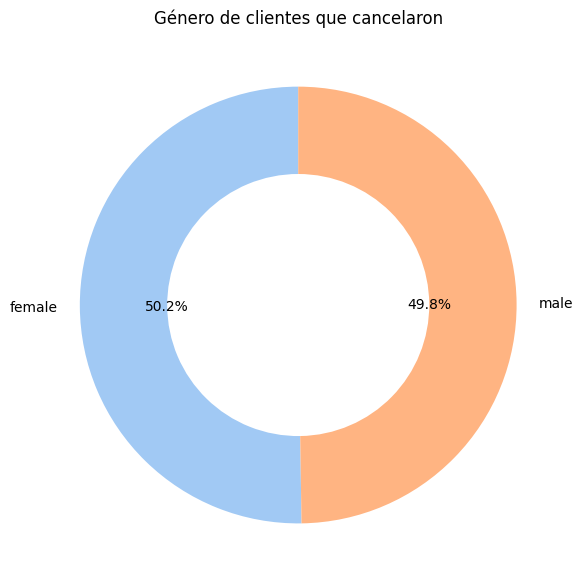

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(clientes_baja_genero['Total'], labels=clientes_baja_genero['Genero'],
        autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops=dict(width=0.4))

centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Género de clientes que cancelaron')
plt.tight_layout()
plt.show()

In [27]:
# hombres que cancelan

condicion_h = (datos_clientes_baja['gender'] == 'male')
datos_hombres_cancelan = datos_clientes_baja[condicion_h]

print("Hombres que cancelan:")
print()
hombres_baja_genero, hombres_baja_contrato, hombres_baja_pago = analisis(datos_hombres_cancelan, True)

Hombres que cancelan:

Distribución por Género:
  Genero  Total  Porcentaje
0   male    930       100.0

Distribución por Tipo de Contrato:
         Contrato  Total  Porcentaje
0  month-to-month    813   87.419355
1        one year     91    9.784946
2        two year     26    2.795699

Distribución por Método de Pago:
            Modalidad_pago  Total  Porcentaje
0         electronic check    549   59.032258
1             mailed check    158   16.989247
2  bank transfer automatic    122   13.118280
3    credit card automatic    101   10.860215


In [28]:
hombres_genero, hombres_contrato, hombres_pago = economicos(datos_hombres_cancelan, True)

Gasto por Género:
        Charges.Total
gender               
male          1509410

Gasto por Tipo de Contrato:
                Charges.Total
Contract                     
month-to-month         991783
one year               364789
two year               152838

Gasto por Método de Pago:
                         Charges.Total
PaymentMethod                         
bank transfer automatic         314340
credit card automatic           255007
electronic check                858245
mailed check                     81818


<ipython-input-29-2566845870>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Contract', y = 'Charges.Total', data = hombres_contrato, palette = 'tab10')


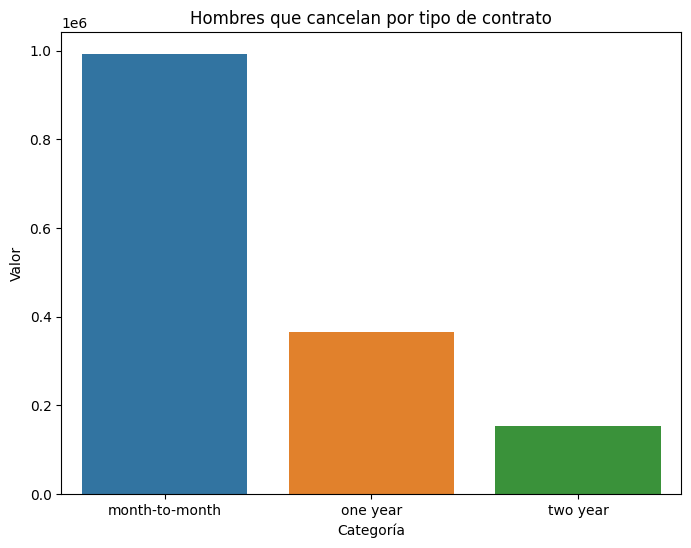

In [29]:
# Gráfico de tipo de contrato de hombres que cancelan

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Contract', y = 'Charges.Total', data = hombres_contrato, palette = 'tab10')
plt.title('Hombres que cancelan por tipo de contrato')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

<ipython-input-30-1036369315>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'PaymentMethod', y = 'Charges.Total', data = hombres_pago, palette = 'pastel')


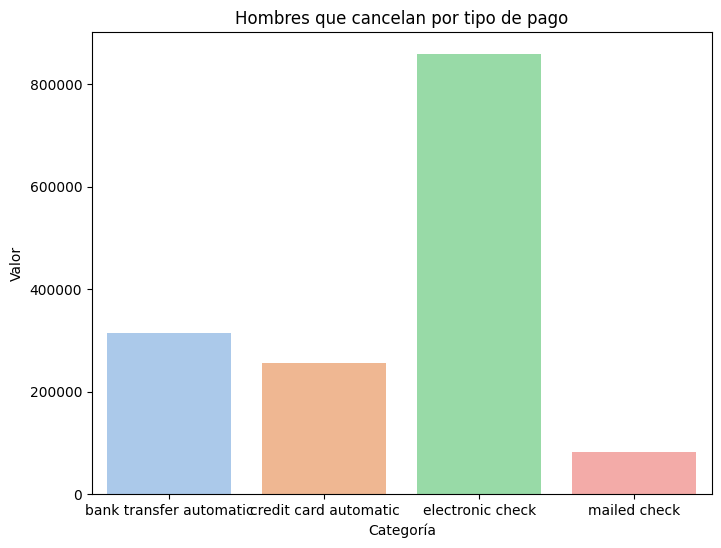

In [30]:
# Gráfico de tipo de pago de hombres que cancelan

plt.figure(figsize=(8, 6))
sns.barplot(x = 'PaymentMethod', y = 'Charges.Total', data = hombres_pago, palette = 'pastel')
plt.title('Hombres que cancelan por tipo de pago')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

In [31]:
# mujeres que cancelan

condicion_m = (datos_clientes_baja['gender'] == 'female')
datos_mujeres_cancelan = datos_clientes_baja[condicion_m]

print("Mujeres que cancelan:")
print()
mujeres_baja_genero, mujeres_baja_contrato, mujeres_baja_pago = analisis(datos_mujeres_cancelan, True)

Mujeres que cancelan:

Distribución por Género:
   Genero  Total  Porcentaje
0  female    939       100.0

Distribución por Tipo de Contrato:
         Contrato  Total  Porcentaje
0  month-to-month    842   89.669862
1        one year     75    7.987220
2        two year     22    2.342918

Distribución por Método de Pago:
            Modalidad_pago  Total  Porcentaje
0         electronic check    522   55.591054
1             mailed check    150   15.974441
2  bank transfer automatic    136   14.483493
3    credit card automatic    131   13.951012


In [32]:
mujeres_genero, mujeres_contrato, mujeres_pago = economicos(datos_mujeres_cancelan, True)

Gasto por Género:
        Charges.Total
gender               
female        1352633

Gasto por Tipo de Contrato:
                Charges.Total
Contract                     
month-to-month         934617
one year               310120
two year               107896

Gasto por Método de Pago:
                         Charges.Total
PaymentMethod                         
bank transfer automatic         271145
credit card automatic           290153
electronic check                708820
mailed check                     82515


<ipython-input-33-2393479622>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Contract', y = 'Charges.Total', data = mujeres_contrato, palette = 'tab10')


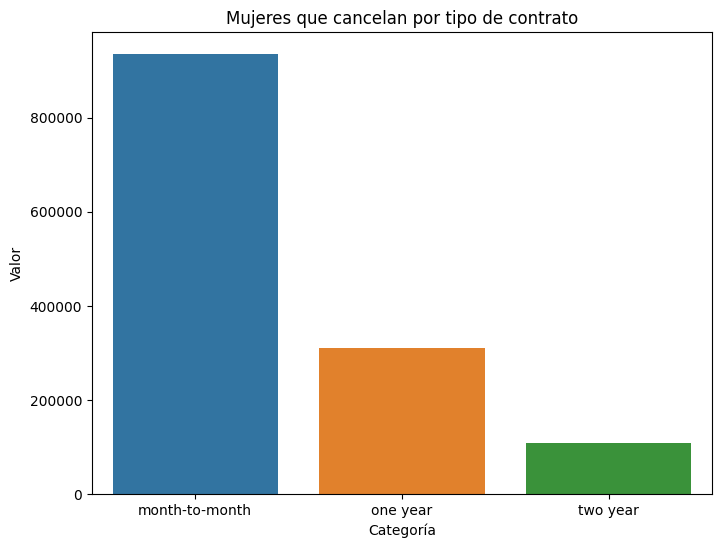

In [33]:
# Gráfico de tipo de contrato de mujeres que cancelan

plt.figure(figsize=(8, 6))
sns.barplot(x = 'Contract', y = 'Charges.Total', data = mujeres_contrato, palette = 'tab10')
plt.title('Mujeres que cancelan por tipo de contrato')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

<ipython-input-34-1403404252>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'PaymentMethod', y = 'Charges.Total', data = mujeres_pago, palette = 'pastel')


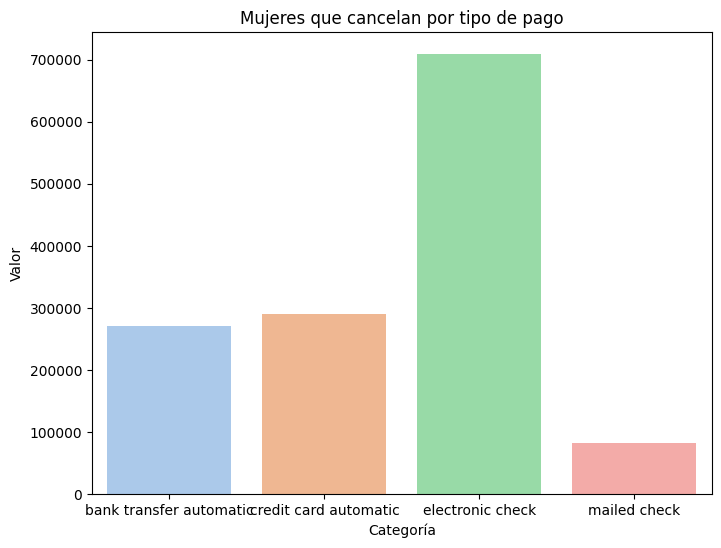

In [34]:
# Gráfico de tipo de pago de mujeres que cancelan

plt.figure(figsize=(8, 6))
sns.barplot(x = 'PaymentMethod', y = 'Charges.Total', data = mujeres_pago, palette = 'pastel')
plt.title('Mujeres que cancelan por tipo de pago')
plt.xlabel('Categoría')
plt.ylabel('Valor')
plt.show()

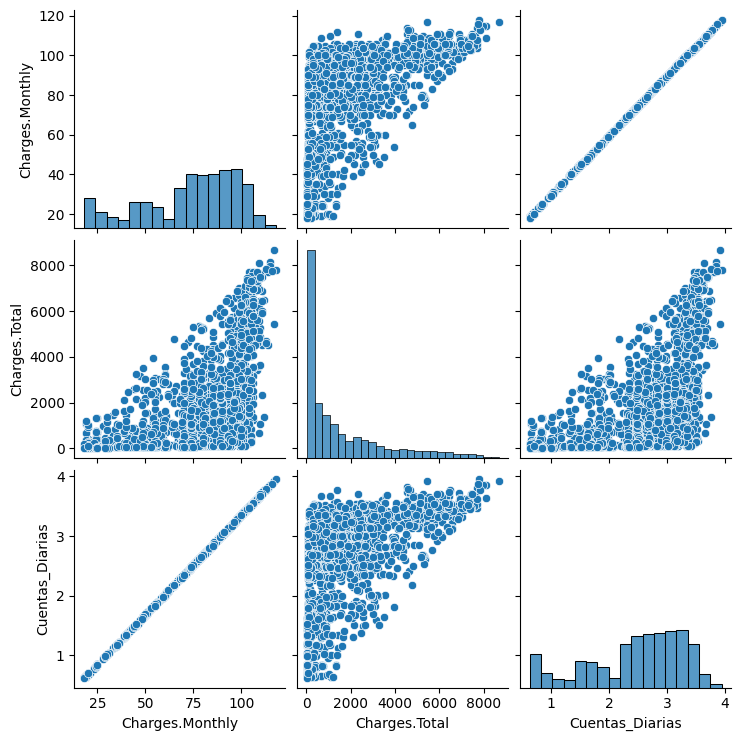

In [35]:
datos_clientes_baja_correlacion = datos_clientes_baja[['Charges.Monthly',	'Charges.Total',	'Cuentas_Diarias']]
sns.pairplot(datos_clientes_baja_correlacion)
plt.show()

# 📄Informe final

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## Introducción

El objetivo del análisis es comprender los factores por los que la empresa Telecom X enfrenta una alta tasa de cancelaciones.

## Limpieza y Tratamiento de Datos

### Importar datos

Los datos provienen de un archivo json, el cual es leido mediante l librería pandas, que esta confrmado por 7267 filas y 6 columnas.

Dado que el dataframe contiene diccionarios en algunas columnas mediante un proceso de normalización se desagregan en 21 columnas y el mismo número de filas 7267, eso se lleva acabo mediante el siguiente código:


```
columnas_a_normalizar = ['customer', 'phone', 'internet', 'account']

# Normalizar cada columna y combinarlas
dfs_normalizados = [pd.json_normalize(datos_pre[col]) for col in columnas_a_normalizar]
datos = pd.concat([datos_pre.drop(columnas_a_normalizar, axis=1)] + dfs_normalizados, axis=1)
```

Se eliminaron 224 registros ya que no tenían datos en la columna Churn, por lo que el conjunto de datos analizados fue de 7043 registros.

En la columna Charges.Total se reemplazaron los espacios vacíos con ceros y se cambió a tipo de dato flotante.

Se utilizan las funciones regex, y split para homogenizar el texto

Se cambian yes por 1 y 0 en lugar de no

## Análisis Exploratorio de Datos, conclusiones e insights

El porcentaje de clientes que permanecieron fue de 73% y los que se dieron de baja 27%, de acuerdo a la siguiente imagen

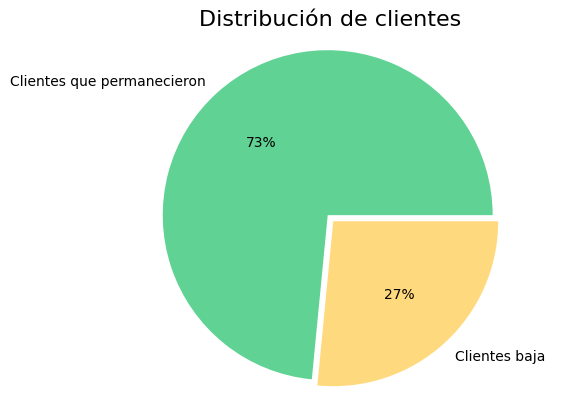

De los 1869 clientes de baja, 50.2% son mujeres y 49.8 son hombres


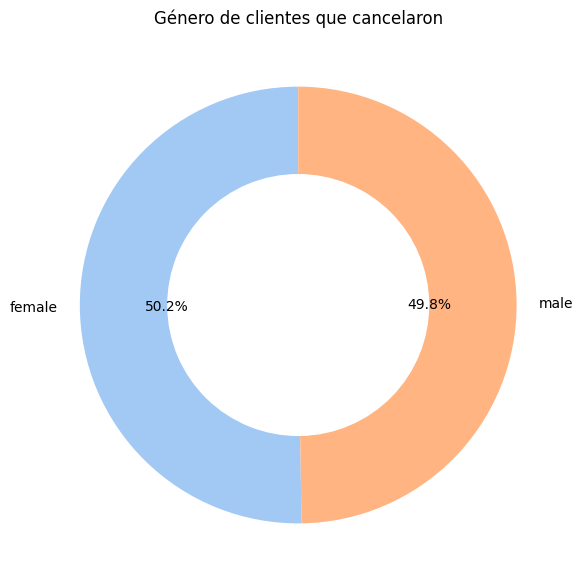

Se observa que los hombres que más cancelan son los que pagan mes a mes, en tanto que los que menos cancelan son aquellos que pagan cada dos años

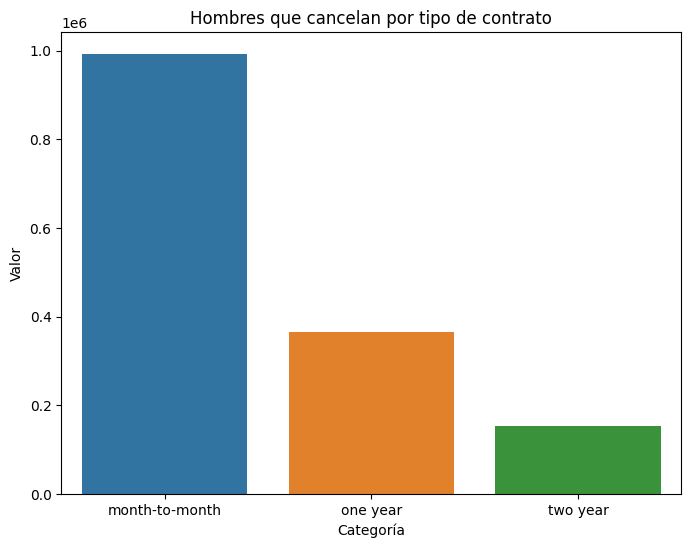

Los hombres que más cancelan son aquellos que pagan mediante cheque electónico, y los que menos cancelan son los que envian cheque por correo


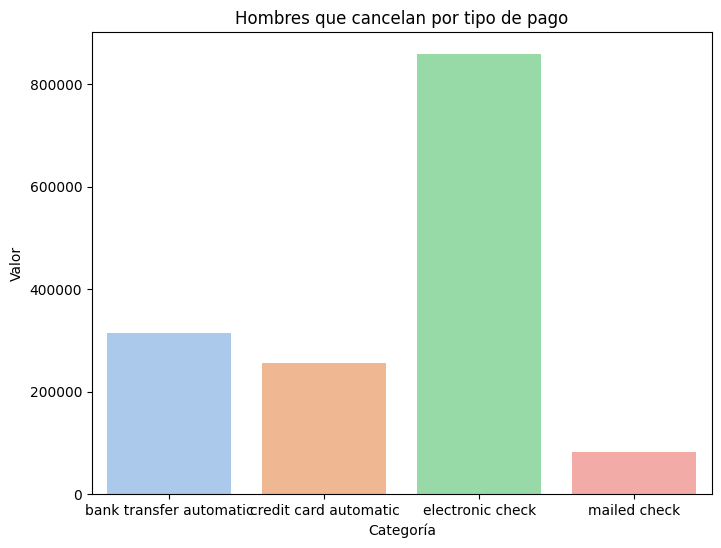

Las mujeres que más cancelan son las que pagan mes a mes, en tanto que las que menos cancelan son las que pagan cada dos años

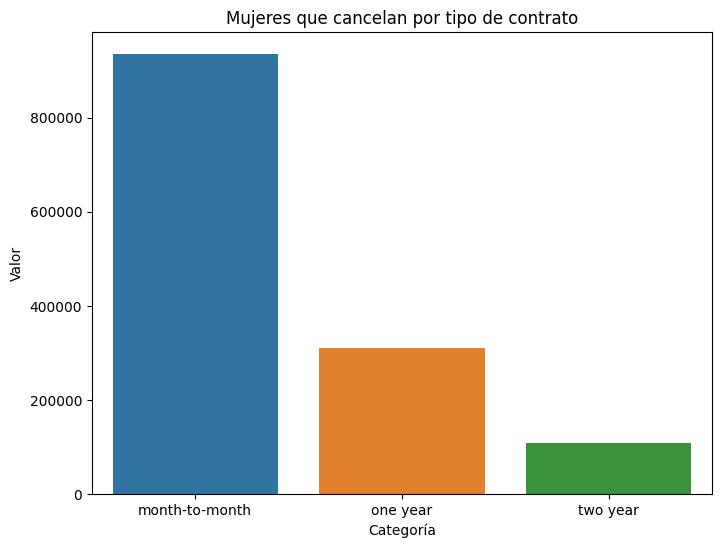

Las mujes que mas cancelan son las que pagan mediante forma electrónica, en tanto que las que menos cancelan son las que pagan con cheque por correo


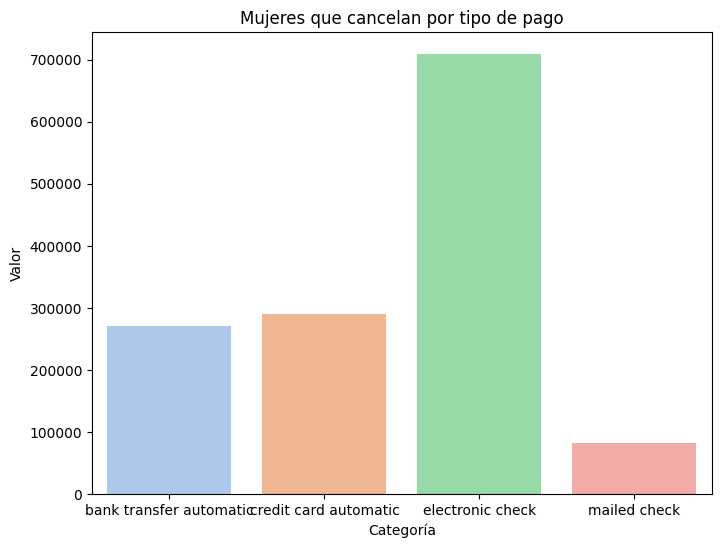

## Recomendaciones


De acuerdo a los resultados obtenidos, los clientes que más cancelan son los que pagan mes a mes mediante forma electrónica, por lo que habría que pensar en una estrategia que permita incentivar más los pagos cada dos años, por ejemplo, proponer un descuento o una bonificación al cambiar el tipo de contratación y domiciliar mediante tarjeta de crédito

## Extra

Se observa la siguiente relación ente las variables económicas

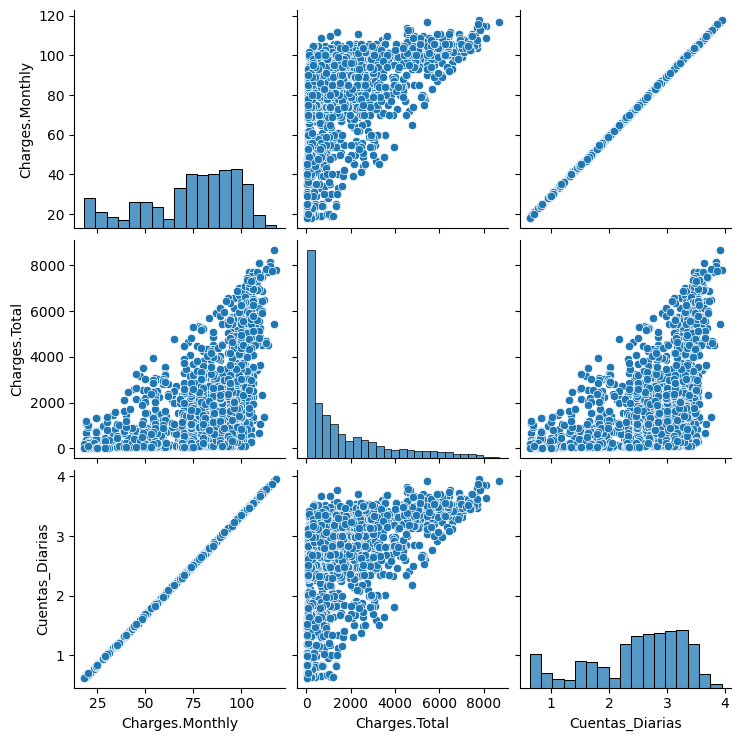